## Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, abs, angle
import math
from scipy.special import genlaguerre
import cmath

In [2]:
# Written for square images with odd pixel length and breadth for trial
# This function will return value at position taking centre of image as origin

def val_at_pos(image, x,y):
    dim_x, dim_y = image.shape
    mid = int((dim_x-1)/2)
    X=mid-y
    Y=x+mid
    return image[X][Y]

In [3]:
# For any given value of (r,theta) this gives (x,y) coordinates

def pol2car(r_, theta_):
    X = np.round(r_*np.cos(theta_)).astype(int)
    Y = np.round(r_*np.sin(theta_)).astype(int)
    return(X,Y)

In [4]:
# This gives pixel values for a given (r, theta) value taking image centre as the origin 

def f_r_theta (image_, r_, theta_):
    (x_, y_) = pol2car(r_, theta_)
    pix_val = val_at_pos(image_, x_,y_)
    return pix_val

In [5]:
s=np.load('C:/Users/HP/Downloads/star_psf_id1.npy')
print(np.shape(s))

(23, 23)


Plotting our image

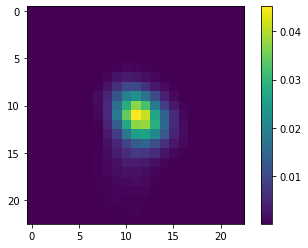

In [6]:
plt.imshow(s)
plt.colorbar()

In [7]:
r_max = float(input("Enter r-range from 0 to "))
r_points = int(input("Enter no. of points in r: "))
theta_max = 2*np.pi
theta_points = int(input("Enter no. of points in theta: "))

Enter r-range from 0 to 11
Enter no. of points in r: 100
Enter no. of points in theta: 100


In [8]:
r= np.linspace(0,r_max,r_points)
theta= np.linspace(0, theta_max,theta_points)

In [9]:
image_pol_arr = np.zeros((len(r), len(r)))

In [10]:
my_image = s

array_dir_r = 0
array_dir_theta = 0

for array_dir_theta in range(0, len(theta)):
    for array_dir_r in range(0, len(r)):
        image_pol_arr [array_dir_r][array_dir_theta] = f_r_theta(my_image, r[array_dir_r], theta[array_dir_theta])


Plotting the convoluted image

<ipython-input-12-0f555eb2f3cb>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm0 = ax.pcolormesh(theta, r, image_pol_arr, cmap = 'jet')#, vmin = -0.001, vmax = 0.001)


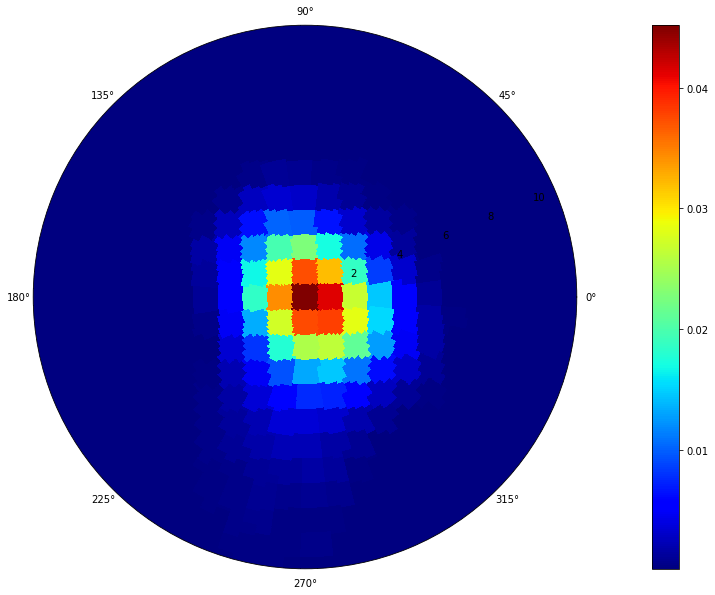

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (27,10), subplot_kw = {'projection': 'polar'})
pcm0 = ax.pcolormesh(theta, r, image_pol_arr, cmap = 'jet')#, vmin = -0.001, vmax = 0.001) 

fig.colorbar(pcm0, ax = ax)

# Plot curve fitting

In [2]:
import numpy as np
from math import factorial as fac
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.special import hermite
from astropy.io import fits

from scipy.optimize import curve_fit

Shape =  (23, 23)


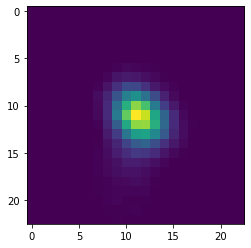

In [3]:
# Our image
image=np.load("C:/Users/HP/Downloads/star_psf_id1.npy")
plt.imshow(image)
print('Shape = ', image.shape)

In [65]:
def gauss_func(X, A, sigma):
    x,y = X
    f = (np.exp(-(x**2 + y**2)/(2*sigma**2)))*A
    return f.ravel()

In [86]:
def gauss_func_2D(X, A, sigma):
    x,y = X
    f = (np.exp(-(x**2 + y**2)/(2*sigma**2)))*A
    return f

In [66]:
x_ = np.linspace(-12,12,23)
y_ = np.linspace(-12,12,23)
x, y = np.meshgrid(x_, y_, indexing= 'ij')

In [ ]:
# Trial to see a sample gauss func
result_gauss = gauss_func((x, y), 0.1, 2)
plt.imshow(result_gauss)

In [90]:
# Curve fitting
coeff, COV = curve_fit(gauss_func, (x,y), image.flatten())


In [91]:
gauss_fitted = gauss_func_2D((x,y), coeff[0], coeff[1])

In [92]:
gauss_fitted

array([[6.56574610e-18, 1.54853575e-16, 2.70290660e-15, 3.49151163e-14,
        3.33786372e-13, 2.36154573e-12, 1.23650755e-11, 4.79148174e-11,
        1.37409119e-10, 2.91631159e-10, 4.58062717e-10, 5.32461999e-10,
        4.58062717e-10, 2.91631159e-10, 1.37409119e-10, 4.79148174e-11,
        1.23650755e-11, 2.36154573e-12, 3.33786372e-13, 3.49151163e-14,
        2.70290660e-15, 1.54853575e-16, 6.56574610e-18],
       [1.54853575e-16, 3.65223224e-15, 6.37482385e-14, 8.23475426e-13,
        7.87237460e-12, 5.56972190e-11, 2.91631159e-10, 1.13007427e-09,
        3.24080354e-09, 6.87814099e-09, 1.08034408e-08, 1.25581530e-08,
        1.08034408e-08, 6.87814099e-09, 3.24080354e-09, 1.13007427e-09,
        2.91631159e-10, 5.56972190e-11, 7.87237460e-12, 8.23475426e-13,
        6.37482385e-14, 3.65223224e-15, 1.54853575e-16],
       [2.70290660e-15, 6.37482385e-14, 1.11269975e-12, 1.43734309e-11,
        1.37409119e-10, 9.72172460e-10, 5.09030407e-09, 1.97249899e-08,
        5.65669167e-08

In [104]:
noise = image - gauss_fitted
noise

array([[ 1.49213955e-04,  1.36229574e-04,  1.49639673e-04,
         1.52406836e-04,  1.46659651e-04,  1.49852529e-04,
         1.51981106e-04,  1.49213907e-04,  1.45808079e-04,
         1.53045120e-04,  1.38357703e-04,  1.41976227e-04,
         1.48362062e-04,  1.34100695e-04,  1.40060893e-04,
         1.42615287e-04,  1.44743910e-04,  1.47723942e-04,
         1.46021074e-04,  1.47298227e-04,  1.44531064e-04,
         1.35378139e-04,  1.51342542e-04],
       [ 1.42189618e-04,  1.47723944e-04,  1.44105346e-04,
         1.51981118e-04,  1.42402469e-04,  1.50278193e-04,
         1.58153730e-04,  1.49212825e-04,  1.43463529e-04,
         1.49207077e-04,  1.37708782e-04,  1.47924245e-04,
         1.57078924e-04,  1.53677110e-04,  1.36439192e-04,
         1.47722814e-04,  1.40273598e-04,  1.47936747e-04,
         1.51129676e-04,  1.49852531e-04,  1.39848172e-04,
         1.49001097e-04,  1.50916825e-04],
       [ 1.47085368e-04,  1.41551042e-04,  1.37081008e-04,
         1.56238278e-04,  1.5

### Plot for visual check

In [74]:
from mpl_toolkits import mplot3d

In [75]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

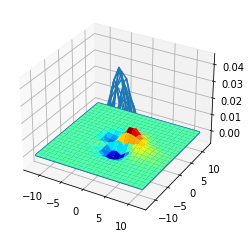

In [105]:
ax = plt.axes(projection ='3d')
ax.plot_wireframe(x, y, image, cmap = 'viridis' )
ax.plot_wireframe(x, y, gauss_fitted, cmap = 'gray')
ax.plot_surface(x, y, noise, cmap = 'jet')

In [106]:
# So lets visualize in 2-d

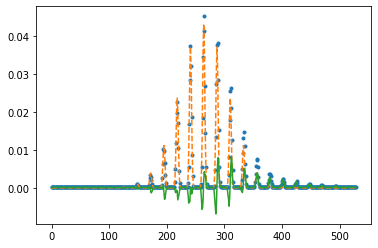

In [119]:
plt.plot(image.flatten(), '.')
plt.plot(gauss_fitted.flatten(), '--')
plt.plot(noise.flatten(), '-')

plt.show()